In [1]:
import csv
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Loading datasets
Note that the seperator of these `csv` files are `\t` instead of `,` used in common.

In [2]:
video_dtype = dict(
    video_name='object',
    video_tags='object',
    video_description='object',
    video_release_date='object',
    video_director_list='object',
    video_actor_list='object',
    video_score='float',
    video_second_class='object',
    video_duration='int'
)

video_file = '../datasets/raw/traindata/video_features_data.csv'
df = pd.read_csv(video_file, sep='\t', index_col='video_id', dtype=video_dtype, quoting=csv.QUOTE_NONE)

## View & Quality
### view
Head view of *user* dataset, which consists of continuous/discrete numbers and Chinese characters. There are `50355` videos' record in the dataset.

In [3]:
len(df)

50355

In [4]:
df.head()

,video_name,video_tags,video_description,video_release_date,video_director_list,video_actor_list,video_score,video_second_class,video_duration
video_id,,,,,,,,,
3460,脱皮爸爸,"院线电影,家庭关系,命运","中年失意的儿子田力行（古天乐饰）在生活上遇到了重重危机：母亲病逝,工作不顺,妻子要求离婚。正...",2017-04-27,司徒慧焯,"吴镇宇,古天乐,春夏,蔡洁",7.4,"剧情,喜剧,奇幻",5913
14553,喜气洋洋小金莲,"古装喜剧,剧情片,喜剧片,内地电影,欢乐喜剧,爱情纠纷",故事始于西门庆为西门药业的“伟哥”产品寻找代言人，西门庆初见潘金莲，一时惊为天人，为成功抱得...,2015-12-30,"杨珊珊,李亚玲","陈南飞,程隆妮,王闯,贾海涛,闫薇儿",5.6,喜剧,6217
1214,风流家族,"男女关系,家庭关系,命运,院线电影",香世仁（钟镇涛 饰）是家财万贯的香港富豪，在满足了一切物质上的要求后，他将生活的重心放在了儿...,2002-03-07,"邱礼涛,杨漪珊","张家辉,卢巧音,钟镇涛,叶童,李蕙敏,张坚庭,袁洁莹,黄佩霞,齐芷瑶,刘以达,叶伟信,邹凯光...",6.8,"都市,喜剧,爱情,家庭",5963
30639,大提琴的故事,"短片,动画片",低音大提琴演奏家史密斯科夫正要去参加某贵族的沙龙，途中他被河边的美丽景色所吸引，驻足观看。兴...,1949-01-01,"伊里·特恩卡,契诃夫",NaN,NaN,"动画,爱情",17371
38522,歌舞大王齐格飞,"喜剧片,人物传记,浪漫爱情",罗伯特．Z．伦纳德导演的这部影片以百老汇最大的歌舞团——齐格菲歌舞团的创办人佛罗伦斯．齐格菲...,1936-04-08,"罗伯特·Z·伦纳德,William Anthony McGuire","威廉·鲍威尔,玛娜·洛伊,路易丝·赖纳,弗兰克·摩根,范妮·布莱斯,弗吉尼亚·布鲁斯,雷吉纳...",7.7,"剧情,歌舞,喜剧",10608


In [5]:
df.describe()

,video_score,video_duration
count,46994.000000,50355.000000
mean,7.361204,3676.101122
std,0.819788,2862.891368
min,5.000000,0.000000
25%,7.000000,148.000000
50%,7.400000,5030.000000
75%,7.900000,5818.000000
max,9.800000,23536.000000


### Quality
- [x] No duplicte record.
- [ ] No `nan` record.

Damn, this dataset shows low quality that more than one third of it records contain `nan`.

In [6]:
# check duplicte
print(f'duplicate num: {df.index.nunique() - df.shape[0]}')
# check nan
print('nan numbers:')
pd.DataFrame(df.isnull().sum()).T

duplicate num: 0
nan numbers:


,video_name,video_tags,video_description,video_release_date,video_director_list,video_actor_list,video_score,video_second_class,video_duration
0,9,7989,196,674,11138,10320,3361,5991,0


#### `Nan` process
* video_name: not a valid feature.
* video_tages: replace `nan` by string `'nan'`
* video_description: not a valid feature (candidate feature).
* video_release_date: replace `nan` by `1850-01-01`.
* video_director_list: replace `nan` by string `'nan'`.
* video_actor_list: replace `nan` by string `'nan'`.
* video_score: replace `nan` by `0.0`.
* video_second_class: replace `nan` by string `'nan'`.

In [7]:
df.video_name.fillna('nan', inplace=True)
df.video_tags.fillna('nan', inplace=True)
df.video_description.fillna('nan', inplace=True)
df.video_release_date.fillna('1850-01-01', inplace=True)
df.video_director_list.fillna('nan', inplace=True)
df.video_actor_list.fillna('nan', inplace=True)
df.video_score.fillna(0, inplace=True)
df.video_second_class.fillna('nan', inplace=True)
print('nan numbers:')
pd.DataFrame(df.isnull().sum()).T

nan numbers:


,video_name,video_tags,video_description,video_release_date,video_director_list,video_actor_list,video_score,video_second_class,video_duration
0,0,0,0,0,0,0,0,0,0


## Statistics
* mean
* variance
* information entropy

Based on the following analysis, we select `video_release_date`, `video_score`, `video_second_class`, and `video_duration` as video's features.

### Analysis tools

In [8]:
def extract_terms(series:pd.Series) -> list:
    terms = list()
    for row in series.values:
        term = row.split(',')
        term = [t.strip() for t in term]
        terms.append(term)
    return terms

def list_flatten(x):
    flatten = list()
    for i in x:
        if isinstance(i, list):
            flatten += list_flatten(i)
        else:
            flatten.append(i)
    return flatten

def info_entropy(count:np.array):
    n = count.sum()
    prob = count.values / n
    return np.sum(prob * -np.log(prob))

### video_tags
The tags of videos are more than `21436`, which seemed to be specific to individual movies rather than a category. It is not a representative feature.

n tags: 21674
number mean: 7.899280243609855
number std: 143.20538427386785
infomation entropy: 5.988537999580134


,0
院线电影,10302
nan,7989
剧情片,7324
人性,5775
男女关系,5232


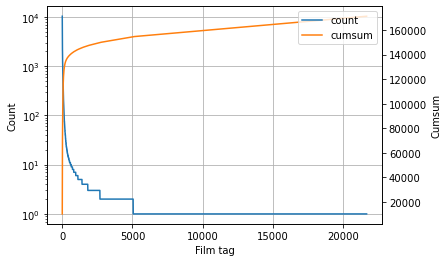

In [9]:
video_tags = extract_terms(df.video_tags)
count = Counter(list_flatten(video_tags))
count = pd.Series(dict(count)).sort_values(ascending=False)
print(f'n tags: {count.shape[0]}')
print(f'number mean: {count.mean()}')
print(f'number std: {count.std()}')
print(f'infomation entropy: {info_entropy(count)}')
fig, ax1 = plt.subplots(1,1)
ax2 = ax1.twinx()
ax1.grid()
ax1.plot(count.values, c='C0', label='count')
ax2.plot(count.cumsum().values, c='C1', label='cumsum')
ax1.set_yscale('log')
ax1.set_xlabel('Film tag')
ax1.set_ylabel('Count')
ax2.set_ylabel('Cumsum')
fig.legend(loc=1, bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)
fig.show()
pd.DataFrame(count).head()

### video_second_class
We analyzed the second class tags of videos, which nicely represent film categories.

n tags: 145
max tag num per film: 9
mean tag num per film: 2.1433422698838247
number mean: 744.3310344827586
number std: 2679.4772112795217
infomation entropy: 2.873241390586258


,0
剧情,25790
喜剧,10930
爱情,8690
动作,8349
nan,5991


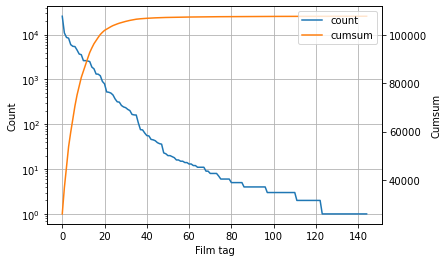

In [10]:
video_second_class   = extract_terms(df.video_second_class)
video_second_class_n = [len(film) for film in video_second_class]
count = Counter(list_flatten(video_second_class))
count = pd.Series(dict(count)).sort_values(ascending=False)
print(f'n tags: {count.shape[0]}')
print(f'max num per film: {max(video_second_class_n)}')
print(f'mean num per film: {sum(video_second_class_n) / len(video_second_class_n)}')
print(f'total tags num mean: {count.mean()}')
print(f'total tags num std: {count.std()}')
print(f'infomation entropy: {info_entropy(count)}')
fig, ax1 = plt.subplots(1,1)
ax2 = ax1.twinx()
ax1.grid()
ax1.plot(count.values, c='C0', label='count')
ax2.plot(count.cumsum().values, c='C1', label='cumsum')
ax1.set_yscale('log')
ax1.set_xlabel('Film tag')
ax1.set_ylabel('Count')
ax2.set_ylabel('Cumsum')
fig.legend(loc=1, bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)
fig.show()
pd.DataFrame(count).head()

### Video Release Date
We simplify this feature to the corresponding decade. The year of release is evenly distributed, and most films released after the 1950s.

In [11]:
df.video_release_date = pd.to_datetime(df.video_release_date)
year_format = lambda date: date.year // 10 * 10
df['video_release_year'] = df.video_release_date.apply(year_format)
count = df.video_release_year.value_counts()
print(f'number mean: {count.mean()}')
print(f'number std: {count.std()}')
print(f'info entropy: {info_entropy(count)}')
pd.DataFrame(count.sort_index(ascending=False))

number mean: 3147.1875
number std: 5952.878947408556
info entropy: 1.764389316114186


,video_release_year
2020,1943
2010,23722
2000,9160
1990,4249
1980,2595
1970,1618
1960,2268
1950,2327
1940,938
1930,516


### Video Score
It's an excellent feature with a good ability of representation and does not need to be processed.

number mean: 1007.1
number std: 979.9606249899085
info entropy: 3.4362176886296667


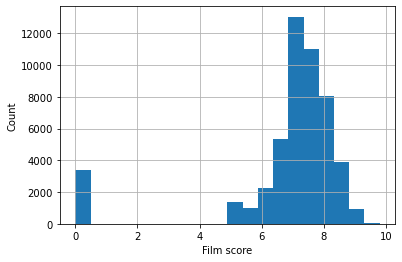

In [12]:
count = df.video_score.value_counts()
print(f'number mean: {count.mean()}')
print(f'number std: {count.std()}')
print(f'info entropy: {info_entropy(count)}')
fig, ax = plt.subplots(1,1)
ax.set_xlabel('Film score')
ax.set_ylabel('Count')
df.video_score.hist(bins=20, ax=ax)
plt.show()

### Video Duration
The scale of this feature is larger than others, therefore $z$-score normalization should be applied to it.

number mean: 7.306297156123041
number std: 15.204418578793913
info entropy: 8.002389315751271


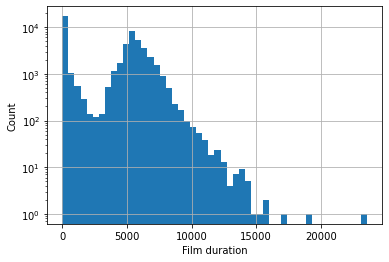

In [13]:
count = df.video_duration.value_counts()
print(f'number mean: {count.mean()}')
print(f'number std: {count.std()}')
print(f'info entropy: {info_entropy(count)}')
fig, ax = plt.subplots(1,1)
ax.set_yscale('log')
ax.set_xlabel('Film duration')
ax.set_ylabel('Count')
df.video_duration.hist(bins=50, ax=ax)
plt.show()